#Загрузка и подготовка данных

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

#Подготовка данных

In [10]:
print("Форма данных:")
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")

Форма данных:
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


Нормализуем значения пикселей от 0-255 к диапазону 0-1 для улучшения обучения

In [11]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Преобразуем числовые метки в one-hot encoding для работы с категориальными данными

In [12]:
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

In [13]:
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train, y_train_categorical, test_size=0.2, random_state=42
)



In [14]:
print(f"\nПосле разделения:")
print(f"x_train_final: {x_train_final.shape}")
print(f"x_val: {x_val.shape}")
print(f"y_train_final: {y_train_final.shape}")
print(f"y_val: {y_val.shape}")


После разделения:
x_train_final: (48000, 28, 28)
x_val: (12000, 28, 28)
y_train_final: (48000, 10)
y_val: (12000, 10)


#Визуализация данных

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Визиализируем некоторые картинки

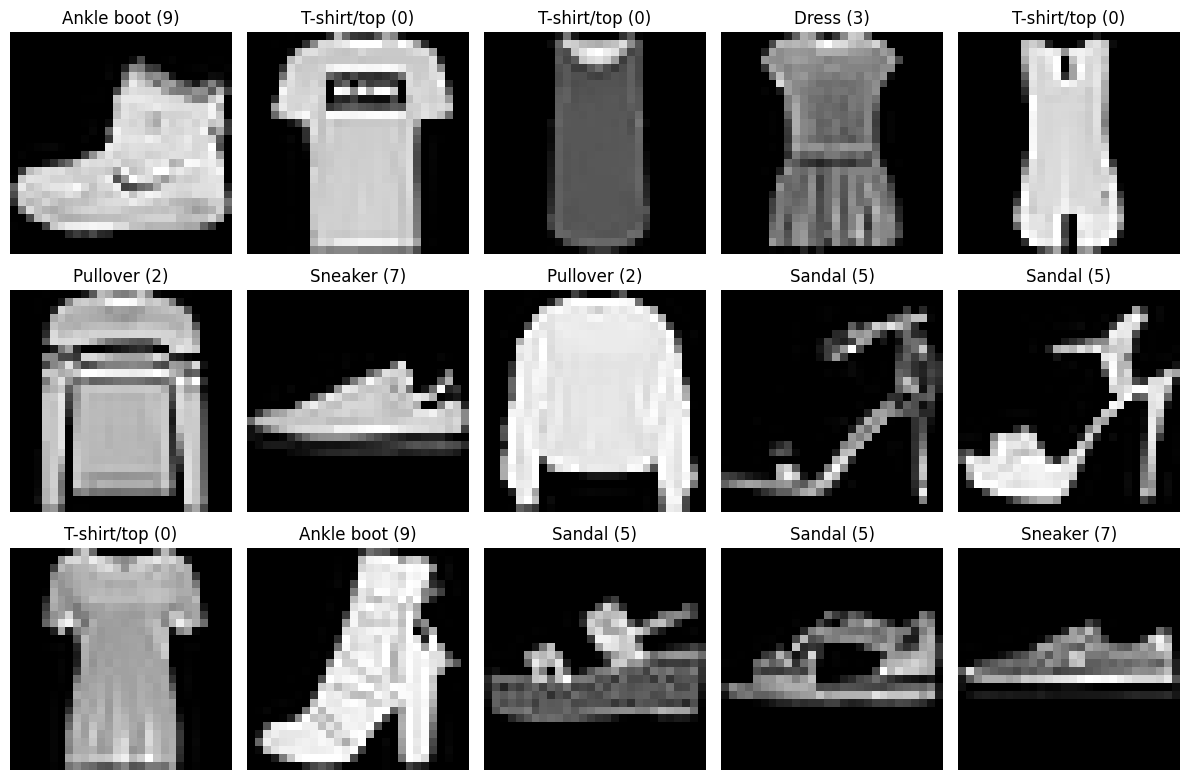

In [16]:
plt.figure(figsize=(12, 8))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'{class_names[y_train[i]]} ({y_train[i]})')
    plt.axis('off')
plt.tight_layout()
plt.show()


#Создание модели

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Обучение модели

In [18]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=0.0001
    )
]
model.summary()
history = model.fit(
    x_train, y_train_categorical,
    batch_size=128,
    epochs=30,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    verbose=1
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,314 (477.79 KB)

 Trainable params: 122,122 (477.04 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - accuracy: 0.7308 - loss: 0.7919 - val_accuracy: 0.7988 - val_loss: 0.5393 - learning_rate: 0.0010
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.8561 - loss: 0.4028 - val_accuracy: 0.8989 - val_loss: 0.2766 - learning_rate: 0.0010
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.8759 - loss: 0.3491 - val_accuracy: 0.9100 - val_loss: 0.2452 - learning_rate: 0.0010
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.8872 - loss: 0.3164 - val_accuracy: 0.8753 - val_loss: 0.3417 - learning_rate: 0.0010
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.8955 - loss: 0.2838 - val_accuracy: 0.9144 - val_loss: 0.2281 - learning_rate: 0.0010
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9022 - loss: 0.2720 - val_accuracy: 0.9271 - val_loss: 0.1900 - learning_rate: 0.0010
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.9095 - l

#Анализ результатов обучения

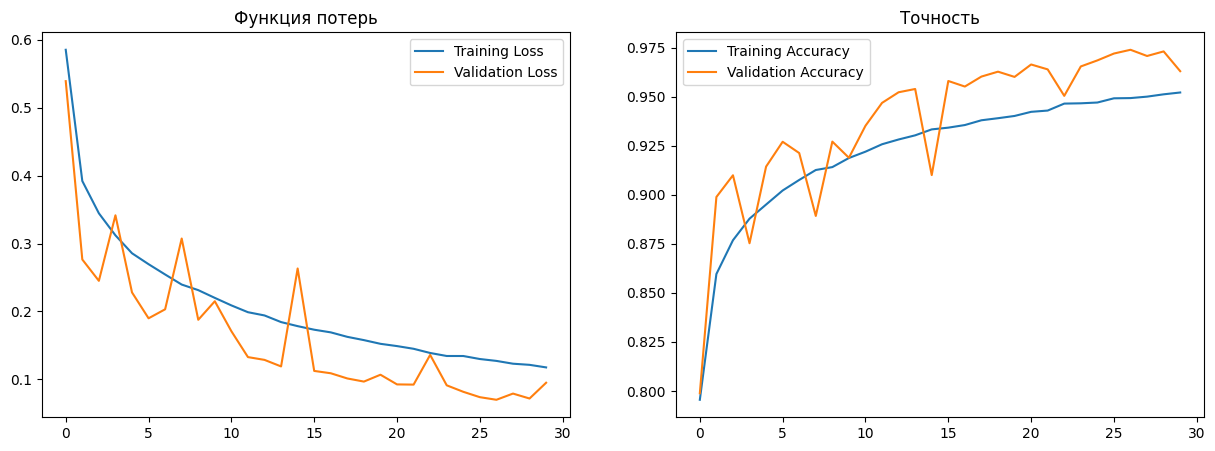

Точность на тестовых данных: 0.9117


In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Функция потерь')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Точность')
ax2.legend()

plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)
print(f"Точность на тестовых данных: {test_accuracy:.4f}")

Выводы по выполнению задания:

Сверточная нейронная сеть показала отличные результаты по сравнению с полносвязной архитектурой, достигнув точности 91.17% на тестовых данных против предыдущих 89.55%.

Графики обучения демонстрируют эффективность CNN - наблюдаются плавное снижение функции потерь и стабильный рост точности на протяжении всех эпох, что свидетельствует о корректно подобранной архитектуре и параметрах обучения.

Batch Normalization и другие методы регуляризации доказали свою эффективность, обеспечивая стабильность процесса обучения и возможность достижения высокой точности.

Результат 91.17% подтверждает целесообразность использования сверточных сетей для задач классификации изображений, поскольку они позволяют эффективно выявлять пространственные паттерны и особенности в данных.